In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from classy import Class
from scipy.interpolate import interp1d

In [3]:
models = ['n-4','n-3','n-2','n-1','n0','n1','n2']

cosmo={}
for M in models:
    cosmo[M] = Class()
    cosmo[M].set({#'gauge':'newtonian',
                  'omega_cdm':0.12038,
                  'z_reio':11.357,
                  'reionization_z_start_max':750,
                  'z_reiomod_start':500,
                  'a_bidm':1e-6,
                  'f_bidm':0.99,
                  'A_bidm':1.9e-41,
                  'm_bidm':1,
                  'bidm_type':'powerlaw',
                  'recfast_Nz0':80000,
                  'recfast_z_initial':1e7
                 })
    if M == 'n-4':
        cosmo[M].set({'n_bidm':-4})
    if M == 'n-3':
        cosmo[M].set({'n_bidm':-3})
    if M == 'n-2':
        cosmo[M].set({'n_bidm':-2})
    if M == 'n-1':
        cosmo[M].set({'n_bidm':-1})
    if M == 'n0':
        cosmo[M].set({'n_bidm':0})
    if M == 'n1':
        cosmo[M].set({'n_bidm':1})
    if M == 'n2':
        cosmo[M].set({'n_bidm':2})
    cosmo[M].compute()


CosmoComputationError: 

Error in Class: thermodynamics_init(L:466) :error in thermodynamics_recombination(ppr,pba,pth,preco,pvecback);
=>thermodynamics_recombination(L:2937) :error in thermodynamics_recombination_with_recfast(ppr,pba,pth,preco,pvecback);
=>thermodynamics_recombination_with_recfast(L:3707) :error in generic_integrator(thermodynamics_derivs_with_recfast, zstart, zend, y, &tpaw, ppr->tol_thermo_integration, ppr->smallest_allowed_variation, &gi);
=>generic_integrator(L:112) :error in rkqs(&x, h, eps, &hdid, &hnext, derivs, parameters_and_workspace_for_derivs, pgi);
=>rkqs(L:156) :condition (xnew == *x) is true; stepsize underflow at x=8.649008e+02

(400, 10000000.0)

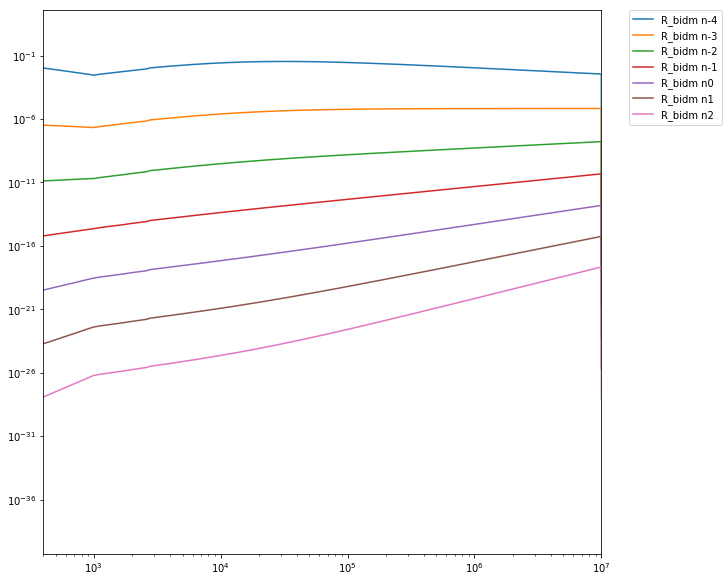

In [3]:
plt.figure(figsize = (10,10))
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
        plt.loglog(Th['z'],Th['Rbidm']*(1+Th['z'])/H,label='R_bidm '+M)
        #plt.loglog(Th['z'],H,label='H '+M)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(400,1e7)

In [4]:
ns = np.array([-4,-3,-2,-1,0,1,2])
He5 = cosmo['n2'].Hubble(1e5)

In [5]:
def cn(n):
    return (2**((n+5)/2) * scipy.special.gamma(3+n/2))/(3*np.sqrt(np.pi))

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in reciprocal
  """


(1e-15, 1e+16)

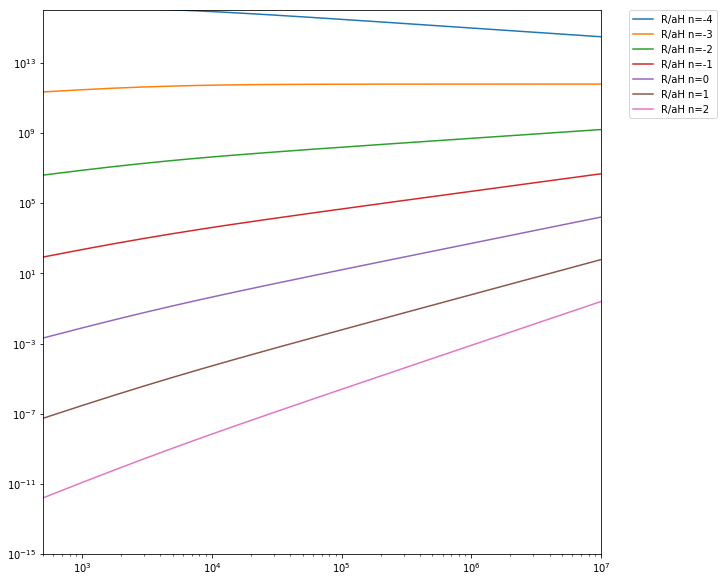

In [6]:
plt.figure(figsize = (10,10))
for n in ns:
    Cn = cn(n)
    #H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
    RaH = 10*Cn*He5/H * (Th['z']/1e5)**3.5 * (1.6e-4 * (Th['z']/1e5)**0.5)**n *0.76
    #nstr = map(str,n)
    #print(n)
    plt.loglog(Th['z'],RaH, label='R/aH n=' + str(n))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(500,1e7)
plt.ylim(1e-15,1e16)